<a href="https://colab.research.google.com/github/kamrulhasan04947/cancer_detection_votingClassifeir/blob/main/vgg16deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import numpy as np
import seaborn as sns
from keras.applications.vgg16 import VGG16
from google.colab.patches import cv2_imshow

In [ ]:
print(os.listdir("/content/drive/MyDrive/Data sets/dataset-20230810T102546Z-001/dataset/train_data/first"))

['00000_12.bmp', '00000_19.bmp', '00000_29.bmp', '00000_37.bmp', '00000_23.bmp', '00000_17.bmp', '00000_26.bmp', '00000_43.bmp', '00000_39.bmp', '00000_38.bmp', '00000_08.bmp', '00000_44.bmp', '00000_06.bmp', '00000_47.bmp', '00000_18.bmp', '00000_10.bmp', '00000_27.bmp', '00000_28.bmp', '00000_22.bmp', '00000_15.bmp', '00000_46.bmp', '00000_50.bmp', '00000_24.bmp', '00000_42.bmp', '00000_16.bmp', '00000_03.bmp', '00000_20.bmp', '00000_09.bmp', '00000_01.bmp', '00000_49.bmp', '00000_04.bmp', '00000_34.bmp', '00000_41.bmp', '00000_21.bmp', '00000_33.bmp', '00000_31.bmp', '00000_48.bmp', '00000_02.bmp', '00000_36.bmp', '00000_45.bmp', '00000_35.bmp', '00000_40.bmp', '00000_14.bmp', '00000_00.bmp', '00000_05.bmp', '00000_25.bmp', '00000_07.bmp', '00000_13.bmp', '00000_32.bmp', '00000_11.bmp', '00000_51.bmp', '00000_30.bmp']


In [ ]:
SIZE = 224

In [ ]:
img =cv2.imread("/content/drive/MyDrive/dataset/melanoma_cancer_dataset/test/benign/melanoma_10000.jpg")

In [ ]:
mid_blure = cv2.medianBlur(img , 5)

In [ ]:
from google.colab.patches import cv2_imshow

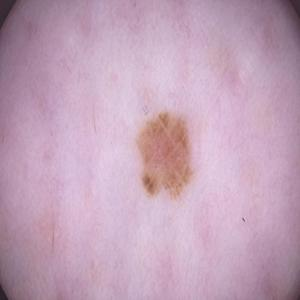

In [ ]:
cv2_imshow(img)

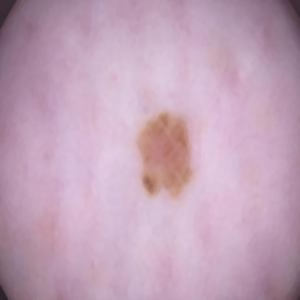

In [ ]:
cv2_imshow(mid_blure)

In [ ]:
gausBlur = cv2.GaussianBlur(img, (5,5),0)

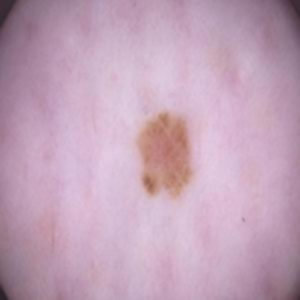

In [ ]:
cv2_imshow(gausBlur)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
    # for dir, _, filenames in os.walk(self.path):
    #   imgclass = dir.split('\\')[-1]
    #   for i in filenames:
    #       if len(i) != 0 and imgclass !='/content/drive/MyDrive/dataset/satelitedata/train/' and imgclass != '':
    #         img_path = imgclass+'/'+i
    #         img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    #         img = cv2.GaussianBlur(img, (5,5),0)
    #         img = self.sigmentation(img)
    #         img = cv2.resize(img, (self.size, self.size))
    #         data.append(img)
    #         class_of_img = img_path.split('/')[-2]
    #         label.append(class_of_img)

In [ ]:
SIZE = 224
train_images = []
train_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/dataset/satelitedata/train/*"):
    for img_path in glob.glob(os.path.join(directory_path + "/*")):
        label = img_path.split('/')[-2]
        print(label)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        cv2_imshow(img)
        train_images.append(img)
        train_labels.append(label)


In [ ]:
type(train_labels)

list

In [ ]:
train_images = np.array(train_images)
print(train_images)
train_labels = np.array(train_labels)
print(train_labels)

[[[[242 242 242]
   [222 222 222]
   [210 210 210]
   ...
   [161 161 161]
   [139 139 139]
   [128 128 128]]

  [[229 229 229]
   [197 197 197]
   [178 178 178]
   ...
   [199 199 199]
   [171 171 171]
   [150 150 150]]

  [[201 201 201]
   [166 166 166]
   [147 147 147]
   ...
   [233 233 233]
   [207 207 207]
   [181 181 181]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [254 254 254]
   [252 252 252]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [254 254 254]
   [252 252 252]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [253 253 253]
   [252 252

In [ ]:
test_images = []
test_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/Data sets/dataset-20230810T102546Z-001/dataset/train_data/second/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path)):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

/content/drive/MyDrive/Data sets/dataset-20230810T102546Z-001/dataset/train_data/second/00000_52.bmp
/content/drive/MyDrive/Data sets/dataset-20230810T102546Z-001/dataset/train_data/second/00000_54.bmp
/content/drive/MyDrive/Data sets/dataset-20230810T102546Z-001/dataset/train_data/second/00000_55.bmp
/content/drive/MyDrive/Data sets/dataset-20230810T102546Z-001/dataset/train_data/second/00000_53.bmp


In [ ]:
test_images = np.array(test_images)
print(test_images)
test_labels = np.array(test_labels)
print(test_labels)

[[[[210 210 210]
   [233 233 233]
   [224 224 224]
   ...
   [191 191 191]
   [225 225 225]
   [250 250 250]]

  [[217 217 217]
   [218 218 218]
   [201 201 201]
   ...
   [194 194 194]
   [227 227 227]
   [249 249 249]]

  [[225 225 225]
   [208 208 208]
   [190 190 190]
   ...
   [182 182 182]
   [214 214 214]
   [238 238 238]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [155 155 155]
   [137 137 137]
   [129 129 129]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [115 115 115]
   [107 107 107]
   [108 108 108]]

  [[255 255 255]
   [254 254 254]
   [254 254 254]
   ...
   [ 91  91  91]
   [ 87  87  87]
   [ 92  92  92]]]


 [[[197 197 197]
   [ 84  84  84]
   [  0   0   0]
   ...
   [254 254 254]
   [254 254 254]
   [254 254 254]]

  [[187 187 187]
   [ 80  80  80]
   [  0   0   0]
   ...
   [254 254 254]
   [254 254 254]
   [254 254 254]]

  [[176 176 176]
   [ 94  94  94]
   [ 29  29  29]
   ...
   [254 254 254]
   [254 254 254]
   [254 254

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
VGG_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in VGG_model.layers:
	layer.trainable = False

In [ ]:
x = Flatten()(VGG_model.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=VGG_model.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
feature_extractor=VGG_model.predict(x_train)

2/2 [==============================] - 41s 14s/step


In [ ]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [ ]:
X_for_RF = features

In [ ]:
feature_extractor

array([[[[0.        , 0.        , 0.08349121, ..., 0.        ,
          1.1567914 , 0.        ],
         [0.        , 0.        , 0.38356283, ..., 0.        ,
          0.81793857, 0.        ],
         [0.        , 0.        , 0.8342813 , ..., 0.        ,
          0.66985935, 0.        ],
         ...,
         [0.        , 0.        , 0.772305  , ..., 0.        ,
          0.91489303, 0.        ],
         [0.        , 0.        , 0.5815804 , ..., 0.        ,
          1.0059643 , 0.        ],
         [0.        , 0.        , 0.25978464, ..., 0.        ,
          1.0061234 , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          1.1729467 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.7847158 , 0.        ],
         [0.        , 0.        , 0.3819949 , ..., 0.        ,
          0.6566127 , 0.        ],
         ...,
         [0.        , 0.        , 0.22034171, ..., 0.        ,
          0.881794  , 0. 

In [ ]:
X_for_RF

array([[0.        , 0.        , 0.08349121, ..., 0.        , 0.9456384 ,
        0.        ],
       [0.18064994, 0.        , 0.20920092, ..., 0.        , 1.1910691 ,
        0.        ],
       [0.47415084, 0.        , 0.6821724 , ..., 0.        , 0.91019714,
        0.        ],
       ...,
       [0.22321683, 0.        , 0.        , ..., 0.        , 1.1491158 ,
        0.        ],
       [0.        , 0.        , 0.23696256, ..., 0.        , 1.0234092 ,
        0.        ],
       [0.        , 0.        , 0.23860574, ..., 0.        , 0.94880414,
        0.        ]], dtype=float32)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier(criterion='entropy', random_state=10)
modelfit = dt.fit(X_for_RF)
prediction = modelfit.predict(x_test)
classs

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/train_data',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/train_data',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model

Found 56 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

 model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Epoch 1/5
2/2 [==============================] - 44s 34s/step - loss: 0.5375 - accuracy: 0.9286 - val_loss: 0.9160 - val_accuracy: 0.2500
Epoch 2/5
2/2 [==============================] - 48s 38s/step - loss: 0.5454 - accuracy: 0.6250 - val_loss: 0.4029 - val_accuracy: 0.9286
Epoch 3/5
2/2 [==============================] - 44s 31s/step - loss: 0.4573 - accuracy: 0.9286 - val_loss: 0.5984 - val_accuracy: 0.9286
Epoch 4/5
2/2 [==============================] - 64s 53s/step - loss: 0.5699 - accuracy: 0.9286 - val_loss: 0.6134 - val_accuracy: 0.9286
Epoch 5/5
2/2 [==============================] - 44s 34s/step - loss: 0.5370 - accuracy: 0.9286 - val_loss: 0.4699 - val_accuracy: 0.9286


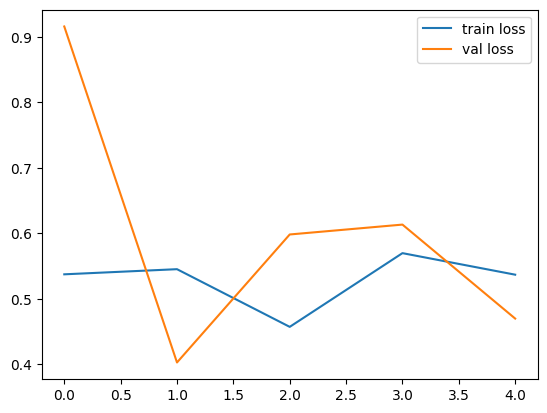

KeyError: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')